In [8]:
import numpy as np 
import os
import pandas as pd 
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

tf.disable_eager_execution()
import shutil
import tensorflow_hub as hub
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from PIL import Image, ImageOps


from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import tensorflow.keras.optimizers
from keras.api._v2.keras.optimizers import legacy
from keras.src.optimizers.legacy.adam import Adam
import random
random.seed(42)
np.random.seed(42)
tf.random.set_random_seed(42)
from tensorflow.keras.models import load_model
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_curve, auc
from scipy.stats import norm
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine

In [9]:
subj_dep_model = load_model('/kaggle/input/cs5567-model-and-numpy-data/model')
subj_dep_w_dropout = load_model('/kaggle/input/dropout-model-weights/model')
subj_dep_w_dropout_and_reg = load_model('/kaggle/input/cs5567-subj-dep-w-dropout-and-reg/model')


In [10]:
test_images = np.load('/kaggle/input/cs5567-model-and-numpy-data/numpy_data/test_images.npy')
test_labels_encoded = np.load("/kaggle/input/cs5567-model-and-numpy-data/numpy_data/test_labels_encoded.npy")

In [11]:
predictions1 = subj_dep_model.predict(test_images)
predictions2 = subj_dep_w_dropout.predict(test_images)
predictions3 = subj_dep_w_dropout_and_reg.predict(test_images)
combined_predictions = (predictions1 + predictions2 + predictions3) / 3

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [12]:
combined_binary_outcomes = np.argmax(combined_predictions, axis=1)
test_true_labels = np.argmax(test_labels_encoded, axis=1)

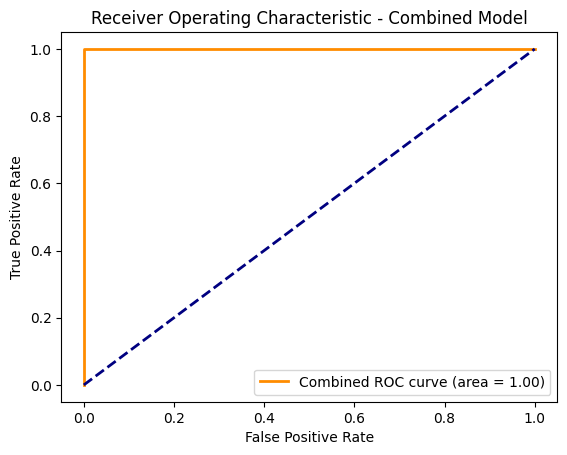

In [13]:
fpr, tpr, thresholds = roc_curve(test_true_labels, combined_predictions[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Combined ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Combined Model')
plt.legend(loc="lower right")
plt.show()

In [16]:
epsilon = 1e-6  # A small constant to avoid extreme values of 0 or 1
tpr_clipped = np.clip(tpr, epsilon, 1 - epsilon)
fpr_clipped = np.clip(fpr, epsilon, 1 - epsilon)

d_prime = (norm.ppf(tpr_clipped) - norm.ppf(fpr_clipped)).mean()

# Print results
print(f"Combined Model ROC AUC: {roc_auc:.2f}")
print(f"Combined Model d-prime: {d_prime:.2f}")

Combined Model ROC AUC: 1.00
Combined Model d-prime: 3.71
